In [ ]:
!nvidia-smi

Sat Apr  8 08:41:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
trainDf = pd.read_csv('../content/train.csv')

In [ ]:
testDf = pd.read_csv('../content/test.csv')

In [ ]:
validDf = pd.read_csv('../content/valid.csv')

In [ ]:
trainDf.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ck0qd8gs6ko7j0721x25cv4o3_jpeg.rf.005f5707706e...,640,480,smoke,125,190,177,286
1,ck0t40rhdz68s0a46ekx049a6_jpeg.rf.00403179fe5f...,640,480,smoke,326,207,494,249
2,ck0m0ch9ugnna07940o8x989j_jpeg.rf.0101cdb46a16...,640,480,smoke,308,166,582,257
3,ck0rr6bfa9b3w0721aw5unwdy_jpeg.rf.00982c053d66...,640,480,smoke,241,204,310,244
4,ck0uk75x5ysls0721e5a9j891_jpeg.rf.00d7fd8503e1...,640,480,smoke,523,208,619,288


In [ ]:
%cd '../content/drive/MyDrive/wildfireDetection/labels/train'

/content/drive/MyDrive/wildfireDetection/labels/train


In [ ]:
!pwd

/content/drive/MyDrive/wildfireDetection/labels/train


In [ ]:
def convertToYoloAnnotationsFormatTrain(width, height, xmin, ymin, xmax, ymax, filename):
  xcen =((xmin + xmax) / 2 ) / width
  ycen = ((ymin + ymax) / 2) / width
  boxWidth = (xmax - xmin) / width
  boxHeight = ( ymax - ymin ) / height


  cat = 0
  with open(filename, 'a') as f:
        f.write(f'{cat} {xcen:.6f} {ycen:.6f} {boxWidth:.6f} {boxHeight:.6f}\n')



In [ ]:
i = 0;
while i != 516:
  string = trainDf['filename'][i]
  string = string[:len(string) - 3]
  convertToYoloAnnotationsFormatTrain(trainDf['width'][i], trainDf['height'][i], trainDf['xmin'][i], trainDf['ymin'][i], trainDf['xmax'][i], trainDf['ymax'][i], string + 'txt')
  i = i + 1

In [ ]:
%cd ..

/content/drive/MyDrive/wildfireDetection/labels


In [ ]:
!pwd

/content/drive/MyDrive/wildfireDetection/labels


In [ ]:
%cd 'valid'

/content/drive/MyDrive/wildfireDetection/labels/valid


In [ ]:
def convertToYoloAnnotationsFormatValid(width, height, xmin, ymin, xmax, ymax, filename):
  xcen =((xmin + xmax) / 2 ) / width
  ycen = ((ymin + ymax) / 2) / width
  boxWidth = (xmax - xmin) / width
  boxHeight = ( ymax - ymin ) / height


  cat = 0
  with open(filename, 'a') as f:
        f.write(f'{cat} {xcen:.6f} {ycen:.6f} {boxWidth:.6f} {boxHeight:.6f}\n')


In [ ]:
i = 0;
while i != 147:
  string = validDf['filename'][i]
  string = string[:len(string) - 3]
  convertToYoloAnnotationsFormatValid(validDf['width'][i], validDf['height'][i], validDf['xmin'][i], validDf['ymin'][i], validDf['xmax'][i], validDf['ymax'][i], string + 'txt')
  i = i + 1

In [ ]:
%cd ..

/content/drive/MyDrive/wildfireDetection/labels


In [ ]:
%cd test

/content/drive/MyDrive/wildfireDetection/labels/test


In [ ]:
def convertToYoloAnnotationsFormatTest(width, height, xmin, ymin, xmax, ymax, filename):
  xcen =((xmin + xmax) / 2 ) / width
  ycen = ((ymin + ymax) / 2) / width
  boxWidth = (xmax - xmin) / width
  boxHeight = ( ymax - ymin ) / height


  cat = 0
  with open(filename, 'a') as f:
        f.write(f'{cat} {xcen:.6f} {ycen:.6f} {boxWidth:.6f} {boxHeight:.6f}\n')


In [ ]:
i = 0;
while i != 74:
  string = testDf['filename'][i]
  string = string[:len(string) - 3]
  convertToYoloAnnotationsFormatTest(testDf['width'][i], testDf['height'][i], testDf['xmin'][i], testDf['ymin'][i], testDf['xmax'][i], testDf['ymax'][i], string + 'txt')
  i = i + 1

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.9 MB/s eta 0:00:00


In [ ]:
import os
import random
import shutil

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip train.zip
!unzip test.zip
!unzip valid.zip

Archive:  train.zip
   creating: train/images/
  inflating: train/images/ck0k99e6p79go0944lmxivkmv_jpeg.rf.035851b1218826a8d8e1f6cff055da7a.jpg  
  inflating: train/images/ck0k99r7bir3f0a460bctrlmy_jpeg.rf.0520c5989e9d6326d3beb346e7edc7c2.jpg  
  inflating: train/images/ck0k9dg0vjxcg0848rmqzl38w_jpeg.rf.aa2243c64fd18ad4e8c179d09c12cbfc.jpg  
  inflating: train/images/ck0k9etuqjxhh0848k6i1mw2f_jpeg.rf.65e16bd6d3135e530e8e7677b83b6481.jpg  
  inflating: train/images/ck0k9ghqt7a8l0944mcvy0jsx_jpeg.rf.5b55501a403c70b4dba61727046660b5.jpg  
  inflating: train/images/ck0k9jss09oxq0721c8pd7eds_jpeg.rf.fa5ce52e0ebc5762bee66acd5bc1aa1d.jpg  
  inflating: train/images/ck0kcaec57i7s0944jkpjyecx_jpeg.rf.0dbf4b042f0b6abc7a9f1a42a82a20dd.jpg  
  inflating: train/images/ck0kcbvwl4tja0794csyimfqu_jpeg.rf.9b8fccc32c80221a31a78bc6b8c54b39.jpg  
  inflating: train/images/ck0kcju199xgd0721ljl6cd2n_jpeg.rf.1b068071c8dfc4cf3573f0a0e217f523.jpg  
  inflating: train/images/ck0kck2czj0l10a46f6xkvofl_jpeg.rf.67

In [ ]:
!rm train.zip
!rm test.zip
!rm valid.zip

In [ ]:
train_path_img = '../content/train/images'
train_path_labels = '../content/train/labels'

val_path_img = '../content/valid/images'
val_path_labels = '../content/valid/labels'

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 6472, done.
remote: Counting objects: 100% (391/391), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 6472 (delta 237), reused 221 (delta 135), pack-reused 6081
Receiving objects: 100% (6472/6472), 5.12 MiB | 20.42 MiB/s, done.
Resolving deltas: 100% (4355/4355), done.


In [ ]:
!pip install -r ../content/ultralytics/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.3 MB/s eta 0:00:00


In [ ]:
!yolo task = detect mode = train model = yolov8l.pt data = /content/custom_model.yaml epochs = 50 imgsz = 640 batch = 8 project = /content/training_results name = wildfire_detection

100% 83.7M/83.7M [00:00<00:00, 244MB/s]
Ultralytics YOLOv8.0.70 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/custom_model.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/training_results, name=wildfire_detection, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task = detect mode = val model = /content/training_results/wildfire_detection/weights/best.pt  data = /content/custom_model.yaml

2023-04-08 16:26:56.196919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 16:26:57.136117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.70 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/valid/labels.cache... 147 images, 0 backgrounds, 1 corrupt: 100% 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:08<00:00,  1.20it/s]
                   all        147        147      0.918      0.905      0.957      0.566
Speed: 4.7ms preprocess, 27.2ms inference, 0.0ms loss, 3.2ms

In [ ]:
!yolo task = detect mode = predict model = /content/training_results/wildfire_detection/weights/best.pt conf = 0.25 source = /content/test/images save = True

2023-04-08 16:25:50.021413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 16:25:51.561748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.70 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/74 /content/test/images/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg: 480x640 1 smoke, 65.8ms
image 2/74 /content/test/images/ck0kd4afx8g470701watkwxut_jpeg.rf.bb5a1f2c2b04be20c948fd3c5cec33ff.jpg: 480x640 1 smoke, 34.1ms
image 3/74 /content/test/images/ck0kdhymna0b10721v4wntit8_jpeg.rf.a08e34d04fb672ce6cf8e94e810ec81d.jpg: 480x640 1 smoke, 34.1ms
ima

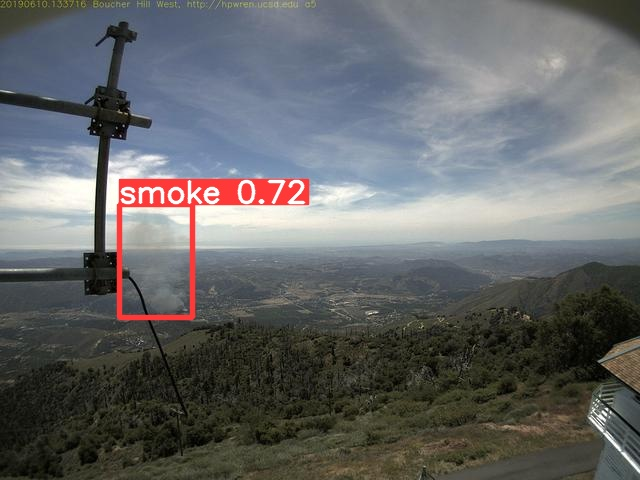

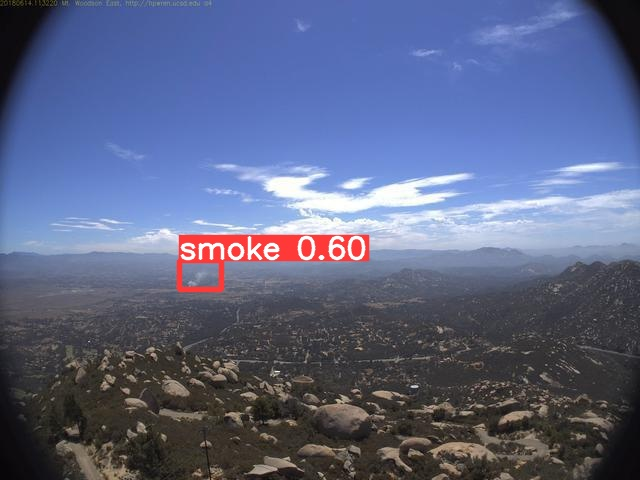

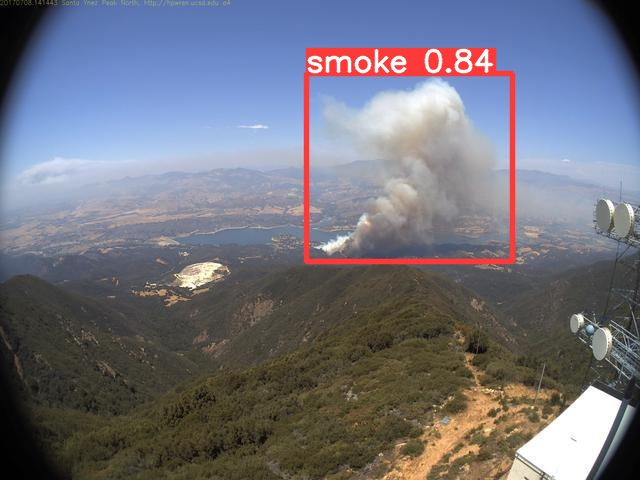

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'../content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename = image_path, width=600))
      print("\n")